In [16]:
import os
import json
import matplotlib.pyplot as plt
from utils.data_utils import split_and_organize_dataset, \
    split_test_data_into_query_and_gallery

In [6]:
# # extract train.zip into data/train
# def extract_train_data():
#     train_zip_path = '../train.zip'
#     if not os.path.exists('../data/train'):
#         os.makedirs('../data/train')
#     os.system(f'unzip -o {train_zip_path} -d ../data/train')

# extract_train_data()

In [5]:
# count all fines in the data train directory
def count_files_in_directory(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count
count_files_in_directory('../data/train')

14034

In [ ]:
# if you have a dataset with lablled images you can create a train and test set
# train_dir, test_dir = split_and_organize_dataset(
#     src_dir="../data/test",
#     dest_dir="../data/test",
#     test_size=0.3
# )

# if you have a custom test set you can split it into query and gallery sets
# query_dir, gallery_dir = split_test_data_into_query_and_gallery(
#     data_dir="directory_with_test_images",
#     test_dir="../data/test",
#     query_ratio=0.3
# )

In [17]:
with open('../results/submission.json') as f:
    submission = json.load(f)
submission[:1]

[{'filename': '21706.jpg',
  'label': 'buildings',
  'samples': ['data/test/gallery/buildings/21680.jpg',
   'data/test/gallery/buildings/20601.jpg',
   'data/test/gallery/buildings/20096.jpg',
   'data/test/gallery/buildings/21293.jpg',
   'data/test/gallery/buildings/23886.jpg',
   'data/test/gallery/street/20683.jpg',
   'data/test/gallery/buildings/20207.jpg',
   'data/test/gallery/buildings/22710.jpg',
   'data/test/gallery/buildings/20465.jpg',
   'data/test/gallery/buildings/23475.jpg']}]

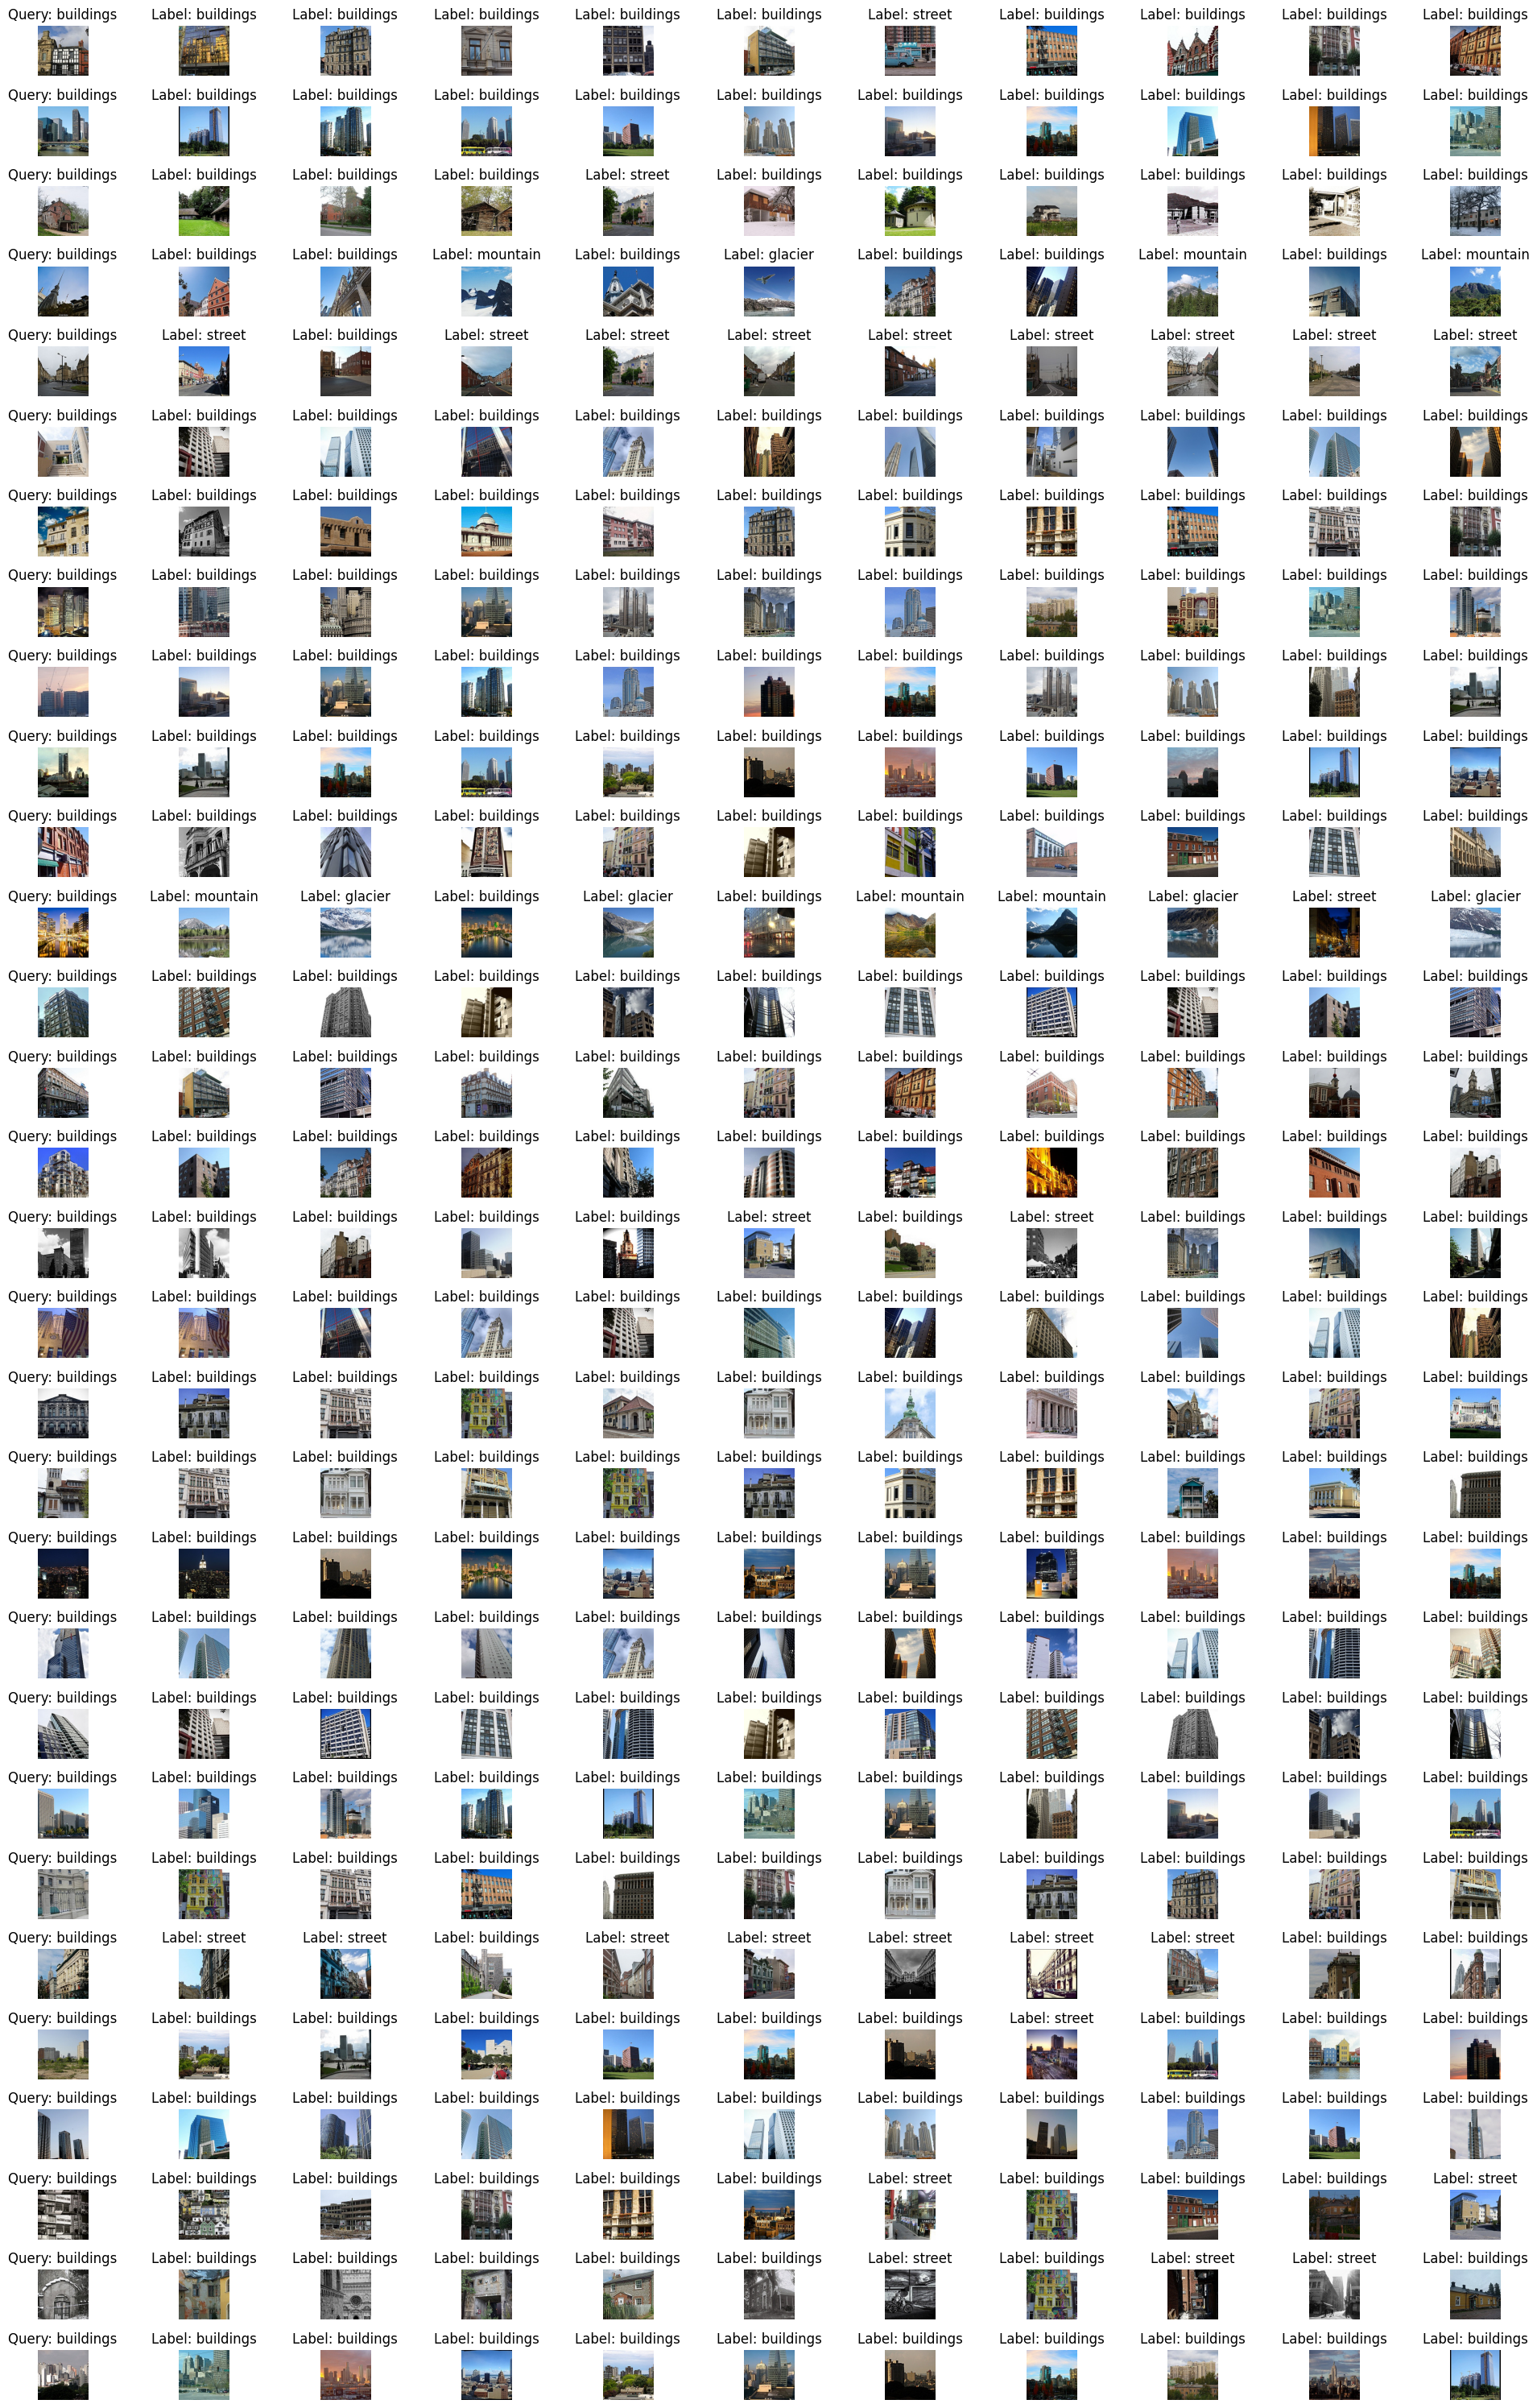

In [21]:
def get_resulting_similar_images_query_in_gallery(submission):
    
    fig, axes = plt.subplots(len(submission[:30]), 11, figsize=(20, len(submission[:30])))
    axes[0, 0].set_title('Query Image')
    for i, item in enumerate(submission[:30]):
        axes[i, 0].imshow(plt.imread(os.path.join(f'../data/test/query/{item['label']}', item['filename'])))
        label = item['label']
        # display it in the image boottom
        axes[i, 0].set_title(f'Query: {label}')
        axes[i, 0].axis('off')
        for j, match in enumerate(item['samples']):
            label = match.split('/')[-2]
            axes[i, j + 1].set_title(f'Label: {label}')
            axes[i, j + 1].imshow(plt.imread(os.path.join(f'../', match)))
            # axes[0, j + 1].set_title(f'Match {j + 1}')
            axes[i, j + 1].axis('off')
    plt.tight_layout()
    plt.show()

get_resulting_similar_images_query_in_gallery(submission)

In [19]:
# calculate top-k accuracy
def calculate_top_k_accuracy(submission, top_k=5):
    correct = 0
    for item in submission:
        if item['label'] in [match.split('/')[-2] for match in item['samples'][:top_k]]:
            correct += 1
    return correct / len(submission) * 100

top_k = 3
top_k_accuracy = calculate_top_k_accuracy(submission, top_k=top_k)
print(f'Top-{top_k} Accuracy: {top_k_accuracy:.2f}%')

Top-3 Accuracy: 97.77%
